# Flight Data - Network Analysis

In [60]:
%matplotlib inline

# Imports 
import os
import pandas as pd
import numpy as np

from collections import OrderedDict

import matplotlib.pyplot as plt

In [2]:
# Set dat path
dat_path = "/Users/thomasdonoghue/Documents/UCSD/1-Classes/2016-2017/" \
           "2-Winter/CSE255_WebMining/Assignments/Assgn-2/Data/"

In [3]:
# Load data for airports and airlines
airlines_df = pd.read_csv(os.path.join(dat_path, 'airlines.csv'))
airports_df = pd.read_csv(os.path.join(dat_path, 'airports.csv'))

In [4]:
# Check out the airports
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
# Load flight data
flights_df = pd.read_csv(os.path.join(dat_path, 'flights2.csv'))

In [6]:
flights_df.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Extract all aiports present in the data
airports = set(airports_df['IATA_CODE'])

In [61]:
# Extract latitude and longitude for each airport
lats = OrderedDict(); lons = OrderedDict()
for i, row in airports_df.iterrows():
    lats[row['IATA_CODE']] = row['LATITUDE']
    lons[row['IATA_CODE']] = row['LONGITUDE']

In [104]:
# Calculate matrix of flightpaths
flightpaths_df = pd.crosstab(flights_df.loc[:, 'ORIGIN_AIRPORT'],
                               flights_df.loc[:, 'DESTINATION_AIRPORT'])

In [105]:
# Get all 'edges' (all airports with flights between them)
edges = []
for air in airports:
    
    fl_paths = flightpaths_df[flightpaths_df[air] > 0].index.tolist()
    
    for path in fl_paths:
        edges.append((air, path))

In [106]:
# Keep all unique flight paths
uniq_edges = [list(fs) for fs in {frozenset(ed) for ed in edges}]

# Equivalently:
#uniq = {frozenset(e) for e in edges}
#uniq_edges = [list(e) for e in uniq]

## Plotting Maps

In [53]:
from mpl_toolkits.basemap import Basemap, cm

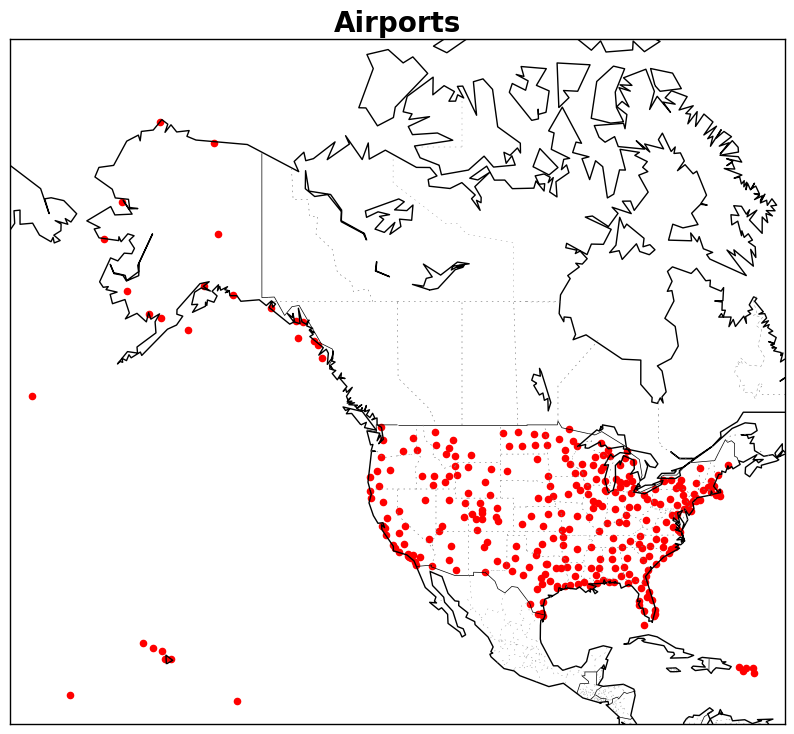

In [103]:
# Plot the mainland airports on a map of the USA

# Figure settings
res = 'c' #
proj = 'merc'

# Initialize figure
fig = plt.figure(figsize=(10, 10))

# Mainland USA only
#m = Basemap(projection=proj, llcrnrlat=24, urcrnrlat=50,\
#            llcrnrlon=-130, urcrnrlon=-60, lat_ts=20, resolution=res)

# All airports (zoom out for Alaska, Hawaii, Peurto Rico)
m = Basemap(projection=proj, llcrnrlat=10, urcrnrlat=75,\
            llcrnrlon=-180, urcrnrlon=-60, lat_ts=20, resolution=res)

# Draw boundaries
m.drawcoastlines()
m.drawcountries()
m.drawstates(linewidth=0.3, linestyle='dotted', color='grey')

# Add point for each airport
x, y = m(list(lons.values()), list(lats.values()))
m.scatter(x, y, 20, marker='o', color='red')

# Add title
plt.title("Airports", {'fontsize': 20, 'fontweight': 'bold'})

## Network Structure

In [110]:
import networkx as nx

In [115]:
dd = dict()
dd['BSM'] = (-97, 30)
for ind, row in airports_df.iterrows():
    dd[row['IATA_CODE']] = (row['LONGITUDE'], row['LATITUDE'])

In [116]:
X = nx.Graph()
for a, p in dd.items():
    X.add_node(a)
    X.node[a]['pos'] = p

for e in uniq_edges:
    X.add_edge(e[0], e[1])

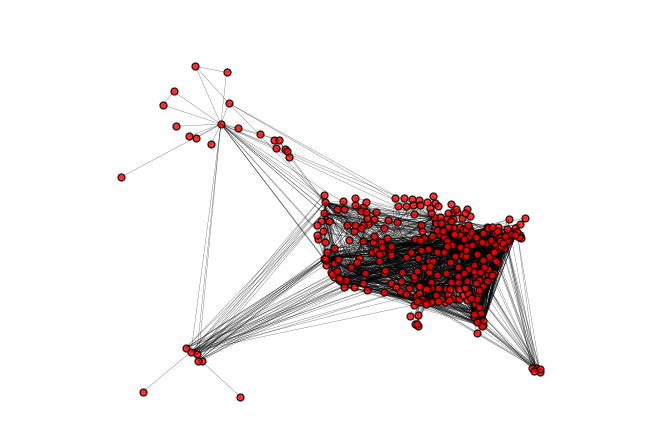

In [121]:
# Plot the graph representation

# Using real locations
nx.draw(X, dd, node_size=25, alpha=0.8, width=0.2)

# Without using real-locations
#nx.draw(X, node_size=50)

In [123]:
# Get out node degree
deg = X.degree()

In [136]:
# Check out some basic network descriptors
print('Number of nodes is: ', X.number_of_nodes())
print('Number of edges is: ', X.number_of_edges())


Number of nodes is:  323
Number of edges is:  2423


In [264]:
#nx.average_clustering(X)

#nx.average_degree_connectivity(X)

#nx.average_neighbor_degree(X)

#nx.average_shortest_path_length(X)

#nx.betweenness_centrality(X)

#nx.center(X)

#nx.closeness_centrality(X)

#nx.closeness_vitality(X)

#nx.current_flow_betweenness_centrality(X)

#nx.degree_centrality(X)

#nx.eccentricity(X)

#nx.edge_betweenness_centrality(X)

#nx.radius(X)

#nx.shortest_path_length(X)

In [265]:
# ??
spls = nx.shortest_path_length(X)

ids = []
maxs = []
pairs = []
for pp in spls.keys():
    q = max(spls[pp].values())
    maxs.append(q)

    #maxs.append(spls[pp][q])
    #if spls[pp][q] == 4:
    #    pairs.append((pp, q))

## Distances between airports

In [274]:
# From here: http://stackoverflow.com/questions/15736995/how-can-i-quickly-estimate-the-distance-between-two-latitude-longitude-points

from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    
    return km

In [276]:
a1 = 'JFK'
a2 = 'LAX'
haversine(lons[a1], lats[a1], lons[a2], lats[a2])

3971.7037653629322